In [2]:
from pyprojroot import here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def plot_target_distribution_vs_feature(raw_df:pd.DataFrame, feature_column_name:str="Age"):
    # Drop rows with NaN values in the 'Age' column
    df = raw_df.copy()
    survived_mapping = {0: 'No', 1: 'Yes'}
    df['Survived'] = df['Survived'].map(survived_mapping)

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature_column_name, hue='Survived', multiple='stack', bins=20)
    plt.title(f'Distribution of Survived with regard to {feature_column_name}')
    plt.xlabel(feature_column_name)
    plt.ylabel('Count')
    plt.legend(title='Survived', labels=['No', 'Yes'])
    plt.show()

In [4]:
data_dir = here("data/binary/Titanic/Titanic-Dataset.csv")
raw_df = pd.read_csv(data_dir)
print("df shape:", raw_df.shape, "\n")
print("df columns:", raw_df.columns)

sex_mapping = {'male': 0, 'female': 1}
raw_df['Sex'] = raw_df['Sex'].map(sex_mapping)

raw_df = raw_df.set_index("PassengerId")
raw_df.head(5)

df shape: (891, 12) 

df columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


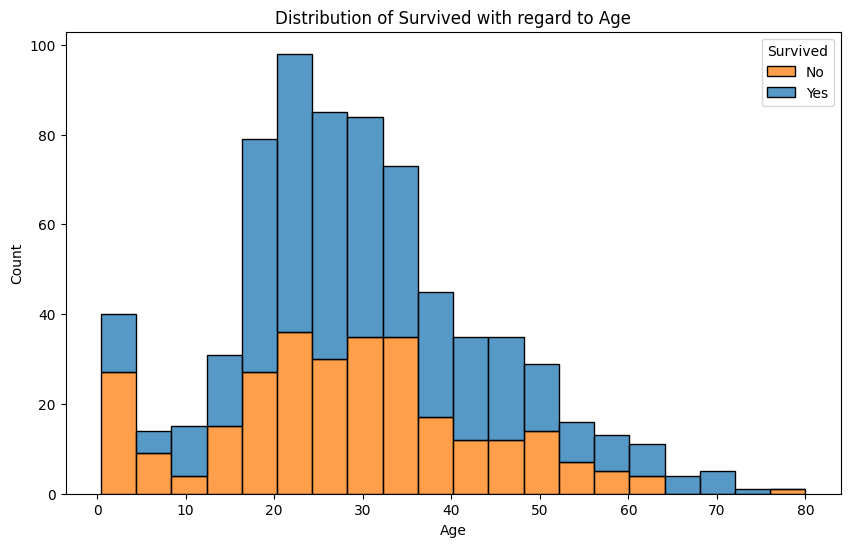

In [5]:
plot_target_distribution_vs_feature(raw_df, feature_column_name="Age")

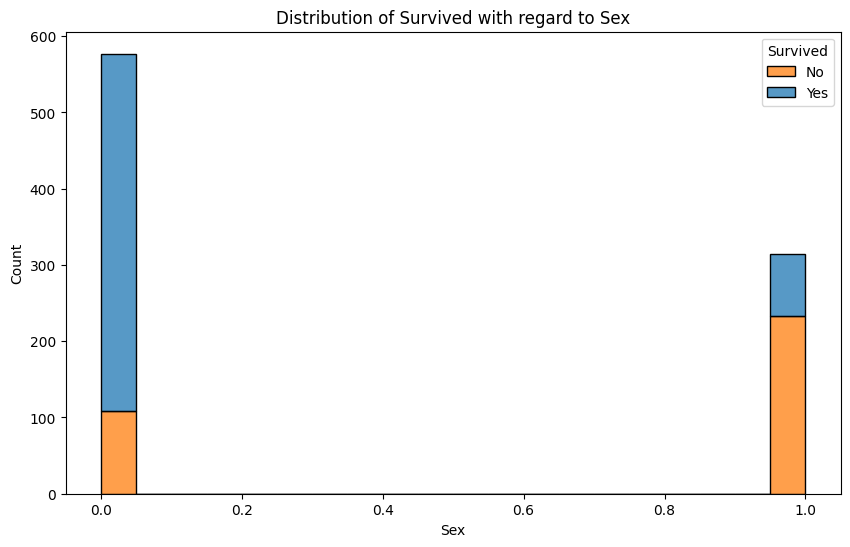

In [6]:
plot_target_distribution_vs_feature(raw_df, feature_column_name="Sex")

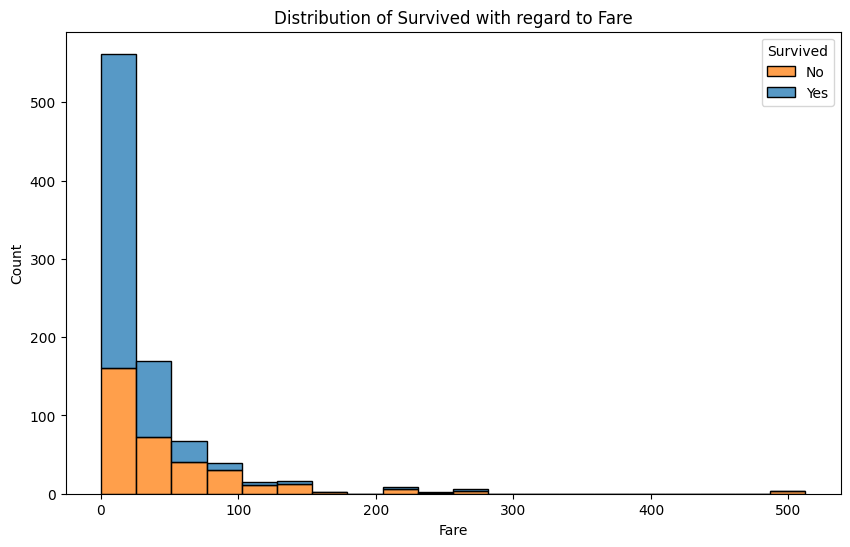

In [7]:
plot_target_distribution_vs_feature(raw_df, feature_column_name="Fare")

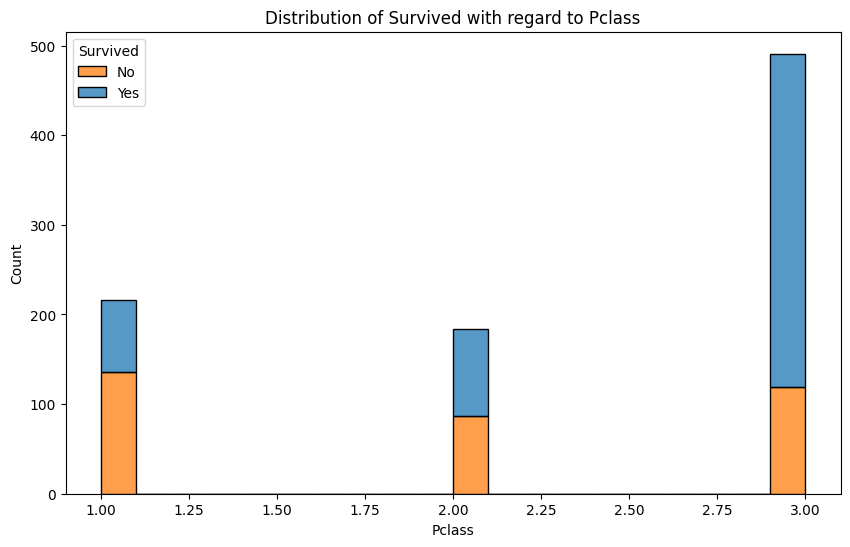

In [8]:
plot_target_distribution_vs_feature(raw_df, feature_column_name="Pclass")

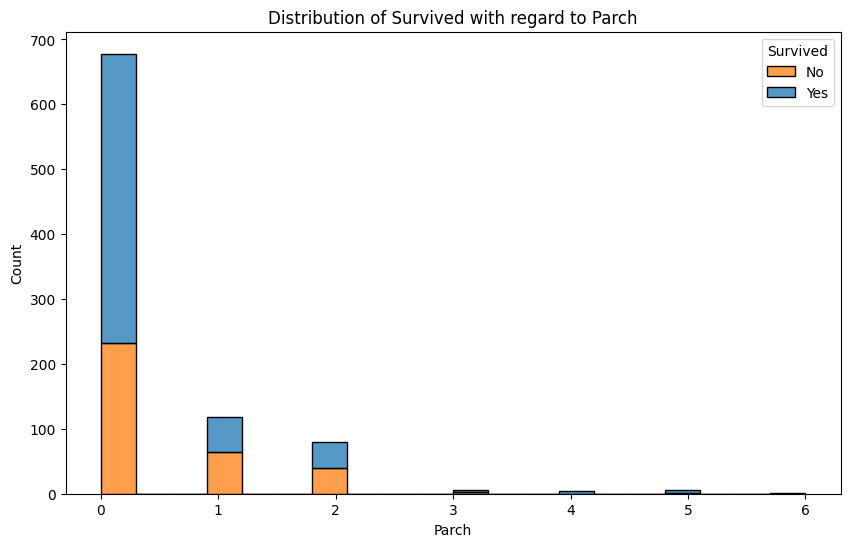

In [9]:
plot_target_distribution_vs_feature(raw_df, feature_column_name="Parch")

In [10]:
raw_df = raw_df.drop(columns=["Cabin", "Age", "Name", "Ticket", "Embarked"])
# raw_df = raw_df.dropna(subset=['Embarked'])
# encode sex

In [11]:
raw_df.describe()

,Survived,Pclass,Sex,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,8.000000,6.000000,512.329200


In [12]:
raw_df.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [13]:
print(raw_df.dtypes)

Survived      int64
Pclass        int64
Sex           int64
SibSp         int64
Parch         int64
Fare        float64
dtype: object


In [14]:
raw_df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [15]:
raw_df.to_parquet(here("data/Binary/Titanic/titanic_cleaned.parquet"), engine='pyarrow')

In [17]:
raw_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64